In [309]:
%%html
<style>
.toc-item > li {
    list-style-type: upper-alpha;
}
</style>

## Kamal Shaham         
## D212 Task 2: Dimension Reduction Methods

<div>
    <h2>Table of Contents</h2>
    <ul class="toc-item">
        <li><a href="#research-question">Research Question</a>
            <ul>
                <li><a href="#goal">Analysis Goal</a></li>
            </ul>
        </li>
        <li><a href="#justification">Principal Component Analysis</a>
            <ul>
                <li><a href="#assumption">Assumption of PCA</a></li>
            </ul>
        </li>
         <li><a href="#variables">Data Preparation</a>
            <ul>
                <li><a href="#standardized">Standardized Variables</a></li>
            </ul>
        </li>
        <li><a href="#matrix">PC Matrix</a>
        <ul>
                <li><a href="#components">Principal Components</a></li>
                <li><a href="#variances">Variances</a></li>
                <li><a href="#total-variance">Total Variance</a></li>
            <li><a href="#results">Analysis Results Summary</a></li>
            </ul>
        </li>
        <li><a href="#thirdparty">Third-party code references</a></li>
        <li><a href="#references">References</a></li>
    </ul>
</div>

## A. Research Question <a id="research-question"></a>

The research question presented for this analysis is whether Principal Component Analysis (PCA) can be used to reduce the dimensionality of the medical dataset while still maintaining meaningful patient information. Understanding patient characteristics is an important part of any hospital's efforts to reduce hospital readmissions.

### A2. Analysis Goal <a id="goal"></a>

A goal of this analysis is to reduce the dimensionality of the medical dataset to understand the remaining variables that explain the most variability. According to an article by Jaadi (2024), reducing the variables of a dataset loses some accuracy but increases simplicity. By making the dataset smaller, it normally becomes easier to explore and visualize. The goal of reducing the medical dataset is to make it easier to analyze while retaining the most significant information for this analysis. Understanding this significant patient information can be important to hospitals that are attempting to reduce their patient readmission rates.

## B. Principal Component Analysis<a id="justification"></a>

As mentioned earlier, Principal Component Analysis (PCA) will be used to analyze the dataset. Principal components are new variables created as linear combinations or mixtures of the initial variables (Jaadi, 2024). While these combinations are mixtures of the initial variables, they are not correlated since most of the information from the initial variables is compressed into the first components.

PCA comprises the following steps after loading the medical dataset:

- Standardizing the continuous initial variables of the medical dataset allows them to contribute equally to the analysis. This is necessary because PCA is sensitive to the variance of the initial variables, meaning larger differences in the ranges of the variables may bias the analysis results.
- Computing the covariance matrix to understand the variable correlation. This is important because sometimes variables may be highly correlated, thus containing redundant information. The covariance matrix allows the analyst to view these correlations.
- Computing the initial principal components based on the features from the covariance matrix. With redundant variables removed, the principal components will be computed based on their order of explained variance.
- Using the components with the highest explained variance with the elbow rule to explain at least 80% of the variance. This step allows for filtering out components beyond the 80% variance threshold, reducing the dimensionality of the dataset by selecting only the most important components.

After following the above steps to perform the PCA, the results will be visualized, and the variance of each principal component will be identified. The expected outcome of this process is to view the principal components and their values.

### B2. Assumption of Principal Component Analysis<a id="assumption"></a>

An assumption of PCA is the standardization of the initial variables. PCA is sensitive to the scale of features, meaning differences in ranges may bias the PCA to focus on features with higher values if their ranges are higher than those of other features. It is expected that the initial variables will be standardized to mitigate this sensitivity.

## C. Initial Variables<a id="variables"></a>

The continuous variables identified for this analysis are displayed below. Some variables such as population may not be deemed meaningful information, however, the PCA aims to reduce the dimensions of the dataset allowing for less meaningful features to be removed.

- Population - The population within a mile radius of the patient
- Children - Number of children living in the patient's household
- Age - Patient's age at the time of admission
- Income - Annual income of the patient/primary insurance holder
- VitD_levels - Patient's vitamin D levels
- Doc_visits - Number of times the primary physician visited the patient while in the hospital
- Full_meals_eaten - Number of full meals the patient ate in the hospital
- vitD_supp - The number of times that vitamin D supplements were administered to the patient
- Initial_days - The number of days the patient stayed in the hospital during the initial visit
- TotalCharge - The amount charged to the patient daily
- Additional_charges - The average amount charged to the patient for miscellaneous hospital services and medications.


### C2. Standardized Variables<a id="standardized"></a>

As in previous courses, the dataset was imported and checked for null and duplicate values. Summary statistics, column information, and row information were also outputted. The 11 features mentioned above were selected and standardized. The summary statistics were then displayed for the newly standardized variables to show their means and standard deviations. As mentioned in section B1, a covariance matrix was computed to understand the variable correlations.

In [315]:
%matplotlib inline

# importing our statistical libraries
import pandas as pd

# importing our initial dataset
wgu=pd.read_csv('medical_clean.csv')

#viewing first 5 rows and column information
print(wgu.head())
print(wgu.columns)

#checking for missing/null values
print(wgu.isnull().sum())

#checking for duplicate values of any rows
print(wgu.duplicated().any())

# checking for duplicate values based on customer_id unique key
print(wgu.duplicated('Customer_id').any())

# view new dataset after selecting needed columns
print(wgu.head())
print(wgu.columns)
print(wgu.info())

# variable statistics to check distributions
print(wgu.describe(include='all'))

   CaseOrder Customer_id                           Interaction  \
0          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   

                                UID          City State        County    Zip  \
0  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan  35621   
1  176354c5eef714957d486009feabf195      Marianna    FL       Jackson  32446   
2  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha  57110   
3  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca  56072   
4  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William  23181   

        Lat       Lng  ...  TotalCharge Additional_charges Item1 Item2  Item3  \
0  34.34960 -86.72508  ...  3726.702860  

In [316]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# dataframe with only the relevant continuous features needed for this analysis
wgu = wgu[['Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Initial_days', 'TotalCharge', 'Additional_charges']]

# standardize the dataset
scaler = StandardScaler()
norm_wgu = scaler.fit_transform(wgu)
scaled_wgu = pd.DataFrame(norm_wgu, columns=wgu.columns)

# dataset first 5 rows
print(scaled_wgu.head())

# variable statistics to check distributions
print(scaled_wgu.describe().round(2))

   Population  Children       Age    Income  VitD_levels  Doc_visits  \
0   -0.473168 -0.507129 -0.024795  1.615914     0.583603    0.944647   
1    0.090242  0.417277 -0.121706  0.221443     0.483901   -0.967981   
2    0.482983  0.417277 -0.024795 -0.915870     0.046227   -0.967981   
3   -0.526393 -0.969332  1.186592 -0.026263    -0.687811   -0.967981   
4   -0.315586 -0.507129 -1.526914 -1.377325    -0.260366   -0.011667   

   Full_meals_eaten  vitD_supp  Initial_days  TotalCharge  Additional_charges  
0         -0.993387  -0.634713     -0.907310    -0.727185            0.765005  
1          0.990609   0.956445     -0.734595    -0.513228            0.715114  
2         -0.001389  -0.634713     -1.128292    -1.319983            0.698635  
3         -0.001389  -0.634713     -1.244503    -1.460517            0.009004  
4         -0.993387   2.547602     -1.261991    -1.467285           -1.408991  
       Population  Children       Age    Income  VitD_levels  Doc_visits  \
count    10

In [317]:
# creating the covariance matrix based on our standardized data
cov_matrix = pd.DataFrame.cov(scaled_wgu)
print(cov_matrix)

                    Population  Children       Age    Income  VitD_levels  \
Population            1.000100  0.002462 -0.018989  0.005427     0.002652   
Children              0.002462  1.000100  0.009837  0.007177     0.009488   
Age                  -0.018989  0.009837  1.000100 -0.012229     0.010316   
Income                0.005427  0.007177 -0.012229  1.000100    -0.013116   
VitD_levels           0.002652  0.009488  0.010316 -0.013116     1.000100   
Doc_visits            0.012647 -0.002292  0.006899  0.013465     0.010211   
Full_meals_eaten     -0.025610  0.003835  0.008556 -0.011366     0.023226   
vitD_supp             0.009782 -0.004320  0.010015  0.001254    -0.007204   
Initial_days          0.017471  0.022469  0.016266 -0.012466    -0.003642   
TotalCharge           0.019190  0.024103  0.016877 -0.014347    -0.001403   
Additional_charges   -0.004821  0.013550  0.716925 -0.009826     0.008291   

                    Doc_visits  Full_meals_eaten  vitD_supp  Initial_days  

According to the covariance matrix above, the correlation between the `TotalCharge` and `Initial_days` variables is 0.987739. This indicates that these variables provide nearly the same information, demonstrating the effectiveness of using a covariance matrix. By removing the `TotalCharge` variable, the dataset will become less redundant for this analysis. The remaining variables are standardized below and outputted to a CSV file. The variables all have means of 0 and standard deviations of 1.0, as displayed in the variable statistics.

In [319]:
# dataframe with only the relevant continuous features needed for this analysis
wgu = wgu[['Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Initial_days', 'Additional_charges']]

# standardize the dataset
scaler = StandardScaler()
norm_wgu = scaler.fit_transform(wgu)

scaled_wgu = pd.DataFrame(norm_wgu, columns=wgu.columns)
# output to a csv file
scaled_wgu.to_csv('scaled_wgu.csv', index=False)
# dataset first 5 rows
print(scaled_wgu.head())

# variable statistics to check distributions
print(scaled_wgu.describe().round(2))

   Population  Children       Age    Income  VitD_levels  Doc_visits  \
0   -0.473168 -0.507129 -0.024795  1.615914     0.583603    0.944647   
1    0.090242  0.417277 -0.121706  0.221443     0.483901   -0.967981   
2    0.482983  0.417277 -0.024795 -0.915870     0.046227   -0.967981   
3   -0.526393 -0.969332  1.186592 -0.026263    -0.687811   -0.967981   
4   -0.315586 -0.507129 -1.526914 -1.377325    -0.260366   -0.011667   

   Full_meals_eaten  vitD_supp  Initial_days  Additional_charges  
0         -0.993387  -0.634713     -0.907310            0.765005  
1          0.990609   0.956445     -0.734595            0.715114  
2         -0.001389  -0.634713     -1.128292            0.698635  
3         -0.001389  -0.634713     -1.244503            0.009004  
4         -0.993387   2.547602     -1.261991           -1.408991  
       Population  Children       Age    Income  VitD_levels  Doc_visits  \
count    10000.00  10000.00  10000.00  10000.00     10000.00    10000.00   
mean        -

<a id="matrix"></a>
## D. Principal Component Matrix

As the data was standardized in the previous step and one feature was removed based on the covariance matrix, the remaining 10 variables can now be used with PCA to reduce the dimensionality of the dataset. The PCA object was instantiated, and the principal components were fit to the standardized dataset using the `fit_transform` function. The steps performed by the PCA function are then outputted, and the matrix of all the principal components is displayed.

Note: The same pca library was used as shown in Dr.Kamara's analysis webinar, ensure it is installed before running with: `pip install pca`

In [321]:
from pca import pca

# creating the PCA object and passing the 10 variables
pca = pca(n_components = 10)

# fitting the PCA to the standardized dataset and transforming
principalComps = pca.fit_transform(scaled_wgu)

loadings = principalComps["loadings"]
loadings

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,Additional_charges
PC1,-0.023358,0.023518,0.705884,-0.022430,0.019681,0.013911,0.027671,0.019052,0.020365,0.705693
PC2,0.452197,0.080730,0.013160,0.161161,-0.277246,0.102807,-0.577243,0.416054,0.411119,0.009479
PC3,-0.077229,-0.494308,0.024228,0.461923,-0.347531,0.280302,-0.156815,0.031173,-0.556715,0.029904
PC4,0.342053,0.264110,-0.013894,0.282271,0.524935,0.653837,0.126118,-0.082562,-0.087113,-0.002341
PC5,-0.196083,0.615226,0.005101,0.587476,-0.305780,-0.190391,0.006146,-0.325781,0.043989,0.006142
PC6,-0.546957,0.181316,-0.024289,0.124530,0.053374,0.175988,0.216341,0.753368,0.052015,-0.031174
PC7,0.292072,-0.026989,0.006391,0.339398,0.439885,-0.642919,-0.007682,0.306152,-0.312782,0.016430
PC8,0.434050,-0.136659,-0.011245,0.130000,-0.381415,-0.027659,0.760558,0.128683,0.186015,0.006819
PC9,0.245925,0.498032,-0.009845,-0.433293,-0.301795,0.042836,-0.008418,0.186445,-0.613050,0.008178
PC10,0.014584,0.003942,0.707033,0.002118,-0.002469,0.000829,0.010406,0.000651,-0.011899,-0.706835


In [322]:
principalComps

{'loadings':       Population  Children       Age    Income  VitD_levels  Doc_visits  \
 PC1    -0.023358  0.023518  0.705884 -0.022430     0.019681    0.013911   
 PC2     0.452197  0.080730  0.013160  0.161161    -0.277246    0.102807   
 PC3    -0.077229 -0.494308  0.024228  0.461923    -0.347531    0.280302   
 PC4     0.342053  0.264110 -0.013894  0.282271     0.524935    0.653837   
 PC5    -0.196083  0.615226  0.005101  0.587476    -0.305780   -0.190391   
 PC6    -0.546957  0.181316 -0.024289  0.124530     0.053374    0.175988   
 PC7     0.292072 -0.026989  0.006391  0.339398     0.439885   -0.642919   
 PC8     0.434050 -0.136659 -0.011245  0.130000    -0.381415   -0.027659   
 PC9     0.245925  0.498032 -0.009845 -0.433293    -0.301795    0.042836   
 PC10    0.014584  0.003942  0.707033  0.002118    -0.002469    0.000829   
 
       Full_meals_eaten  vitD_supp  Initial_days  Additional_charges  
 PC1           0.027671   0.019052      0.020365            0.705693  
 PC2    

In [323]:
# showing the features that have the most variance on each component
print(pca.results['topfeat'])

      PC             feature   loading  type
0    PC1                 Age  0.705884  best
1    PC2    Full_meals_eaten -0.577243  best
2    PC3        Initial_days -0.556715  best
3    PC4          Doc_visits  0.653837  best
4    PC5            Children  0.615226  best
5    PC6           vitD_supp  0.753368  best
6    PC7          Doc_visits -0.642919  best
7    PC8    Full_meals_eaten  0.760558  best
8    PC9        Initial_days -0.613050  best
9   PC10                 Age  0.707033  best
10   PC6          Population -0.546957  weak
11   PC5              Income  0.587476  weak
12   PC4         VitD_levels  0.524935  weak
13  PC10  Additional_charges -0.706835  weak


<a id="components"></a>
### D2. Principal Components

The PCA object from the PCA library supports the `n_components` attribute. When this attribute is given a percentage, it will capture the specified percentage of explained variance from the provided features. By setting `n_components` to 0.8, the PCA is instructed to determine the principal components that capture at least 80% of the explained variance, following the elbow rule.

The PCA object is instantiated, and the components are fit to the standardized dataset again. The output of the loadings shows that 8 principal components were selected, which explain at least 80% of the variance. The scree plot is also displayed, showing the explained variance by principal components. Incrementing from 7 to 8 PCs allows the explained variance to cover at least 80%, meeting the elbow rule criterion if relying purely on the skree plot.

In [325]:
from pca import pca

# creating the PCA object, capturing 80% of explained variance from the 10 features passed in
# based on elbow rule method
pca = pca(n_components = 0.8)

# fitting the PCA to the standardized dataset and transforming
principalComps = pca.fit_transform(scaled_wgu)

loadings = principalComps["loadings"]
loadings

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [80.0%] explained variance using the [10] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [8] that covers the [80.00%] explained variance.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,Additional_charges
PC1,-0.023358,0.023518,0.705884,-0.022430,0.019681,0.013911,0.027671,0.019052,0.020365,0.705693
PC2,0.452197,0.080730,0.013160,0.161161,-0.277246,0.102807,-0.577243,0.416054,0.411119,0.009479
PC3,-0.077229,-0.494308,0.024228,0.461923,-0.347531,0.280302,-0.156815,0.031173,-0.556715,0.029904
PC4,0.342053,0.264110,-0.013894,0.282271,0.524935,0.653837,0.126118,-0.082562,-0.087113,-0.002341
PC5,-0.196083,0.615226,0.005101,0.587476,-0.305780,-0.190391,0.006146,-0.325781,0.043989,0.006142
PC6,-0.546957,0.181316,-0.024289,0.124530,0.053374,0.175988,0.216341,0.753368,0.052015,-0.031174
PC7,0.292072,-0.026989,0.006391,0.339398,0.439885,-0.642919,-0.007682,0.306152,-0.312782,0.016430
PC8,0.434050,-0.136659,-0.011245,0.130000,-0.381415,-0.027659,0.760558,0.128683,0.186015,0.006819


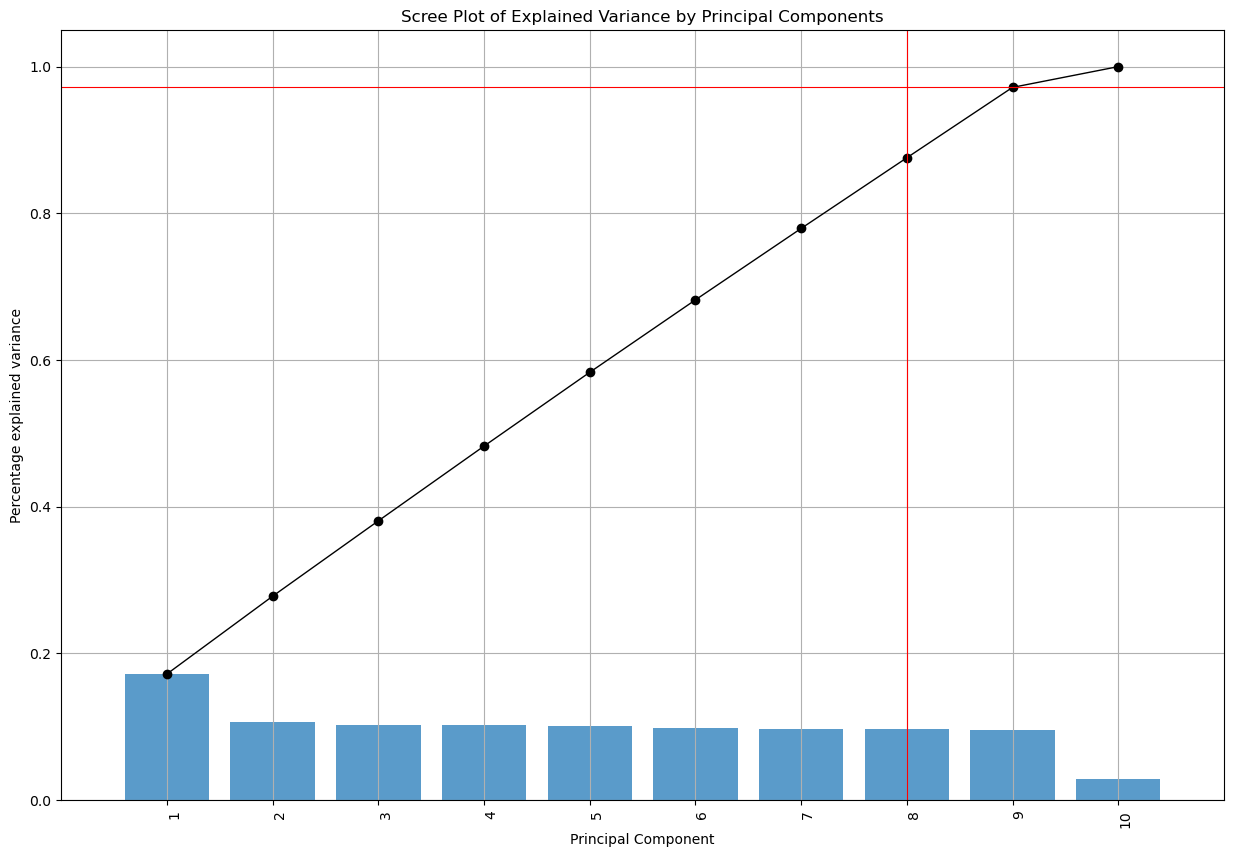

In [326]:
# generating the skree plot to show the explained variance by principal components
fig, ax = pca.plot()

# based on the explained var array, display the total variance for 8 PCs
total_variance = principalComps['explained_var'][7]  # starts from 0
title = f'Scree Plot of Explained Variance by Principal Components'
ax.set_title(title)

# Show the plot
plt.show()

<a id="variances"></a>
### D3. Variances

Based on the pca function in the previous section the 8 principal components selected make up at least 80% of the explained variance. The variance of each principal component is displayed below by referring to the variance_ratio property:

In [328]:
# selecting the variances of the first 8 PCs from the pca
variances = principalComps["variance_ratio"][:8] # first 8 PCs
variance_df = pd.DataFrame(
    [f"{(v * 100):.2f}%" for v in variances], 
    index=[f"PC{i+1}" for i in range(len(variances))],
    columns=['Variance']
)
# display variance table
variance_df


,Variance
PC1,17.20%
PC2,10.61%
PC3,10.27%
PC4,10.19%
PC5,10.06%
PC6,9.87%
PC7,9.74%
PC8,9.64%


<a id="total-variance"></a>
### D4. Total Variance

The variances of each principal component were displayed in the previous section. The `explained_var` property of the pca shows the cumulative variance based on the number of principal components. The total variance captured by the principal components identified in section D2 is displayed below by referring to the 7th index in the `explained_var` array, as it represents the cumulative variance up to the 8th principal component:

In [330]:
total_variance = principalComps['explained_var'][7]  # starts from 0
print(f'The {len(variances)} principal components explain {total_variance*100:.2f}% of the variance.')

The 8 principal components explain 87.57% of the variance.


<a id="results"></a>
### D5. Analysis Results Summary

The analysis used Principal Component Analysis (PCA) to reduce the dimensionality of the dataset, which consisted of 11 continuous variables. After standardizing the data, a covariance matrix was created, revealing a strong correlation between `TotalCharge` and `Initial_days`. The `TotalCharge` variable was removed before PCA was performed as it became redundant. A loading matrix was then generated using the 10 remaining variables.

The elbow rule was used to retain 8 principal components that explained 87.57% of the variance. The elbow rule has several variations for defining a threshold. One article (What Is Principal Component Analysis (PCA)? | IBM, n.d.) mentions that the point at which the Y-axis of the total variance explained creates an "elbow" generally indicates how many PCA components to include. Another article (Determining the Number of Components in Principal Components Analysis - Displayr, n.d.) suggests using the point prior to where the "elbow" is created. In this case, the 8 principal components were selected because that was the number of components that appeared prior to the "elbow" in the scree plot.

With the analysis completed, the dimensionality of the data was reduced while still maintaining an explained variance of 87.57%. The number of principal components retained is higher than what is normally considered optimal for PCA, with anything higher than 3 being less optimal (Mangale, 2021). The number of components can be adjusted by using a different criterion, such as the Kaiser criterion, or by using a different dimensionality reduction technique.

<a id="thirdparty"></a>
## E. Third-party Code References

Algorithm — pca pca documentation. (n.d.). https://erdogant.github.io/pca/pages/html/Algorithm.html#explained-variance 

Panopto. (n.d.). Panopto. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=8c618a96-fdb8-4757-abe2-b023018520ac

<a id="references"></a>
## F. References

A Guide to Principal Component Analysis (PCA) for Machine learning. (n.d.). https://www.keboola.com/blog/pca-machine-learning

Determining the number of components in principal components analysis - Displayr. (n.d.). https://docs.displayr.com/wiki/Determining_the_Number_of_Components_in_Principal_Components_Analysis 

Jaadi, Z. (2024, February 23). A Step-by-Step Explanation of Principal Component Analysis (PCA). Built In. https://builtin.com/data-science/step-step-explanation-principal-component-analysis 

Mangale, S. (2021, December 15). Scree Plot - SANCHITA MANGALE - Medium. Medium. https://sanchitamangale12.medium.com/scree-plot-733ed72c8608 

What is Principal Component Analysis (PCA)? | IBM. (n.d.). https://www.ibm.com/topics/principal-component-analysis